# Showing ConSTRain's genotyping accuracy for each repeat period

In [1]:
import os
import sys
# SRC_DIR environment variable should be the absolute path to the 'multicopy-STR-genotyping' directory
sys.path.append(os.environ["SRC_DIR"])

In [2]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

from multicopy_STR_genotyping import file_io

sns.set_context("poster")
%matplotlib inline

In [9]:
df_comparison = pd.read_csv("../../../results/HG002/2024-12-09_hg002_ConSTRain0.9.1.csv").assign(depth_norm = lambda x: x["depth"] / x["copy_number"])
df_comparison.shape

(1655655, 8)

In [13]:
min_depth, max_depth = 12.0, 44.5
df_in_segdup = pd.read_csv("../../../data/hg38_ver13_0boe_mononucleotides_in_segdup.bed", sep="\t", names=["chr", "start", "end", "period", "unit"])
df_in_segdup = df_in_segdup.assign(str_id = lambda x: [f"{i}_{j + 1}" for i, j in zip(x["chr"], x["start"])])

df_comparison_filt = df_comparison[~df_comparison["str_id"].isin(df_in_segdup["str_id"])].reset_index(drop=True)
df_comparison_filt = df_comparison_filt.query(f"depth_norm >= {min_depth} and depth_norm <= {max_depth}")
print(df_comparison_filt.shape)

(1393426, 8)


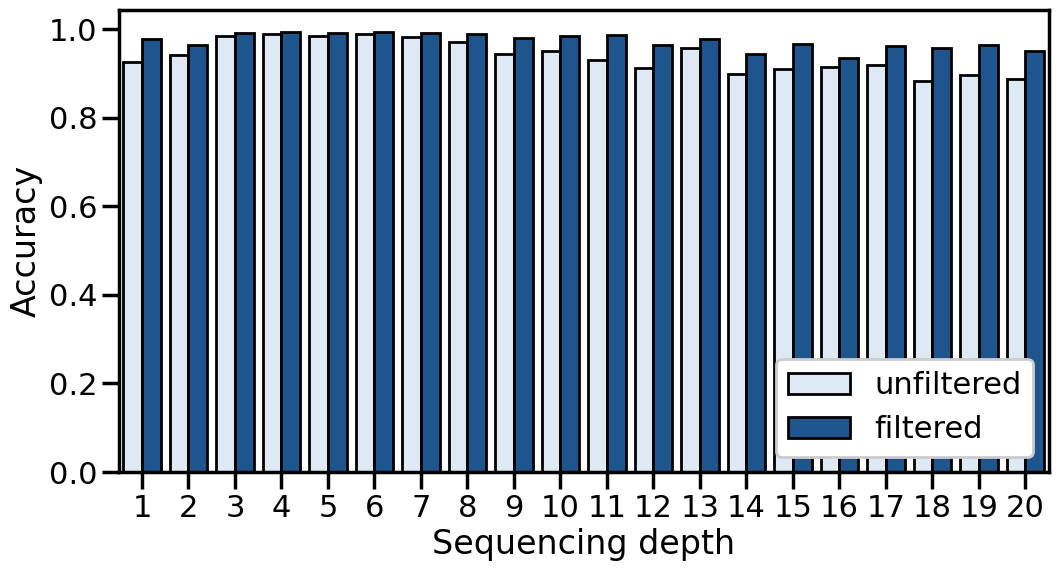

In [21]:
df_plot = df_comparison[["period", "match"]].groupby("period", as_index=False).value_counts(normalize=True).query("match").assign(filt="unfiltered")
df_plot = pd.concat([
    df_plot,
    df_comparison_filt[["period", "match"]].groupby("period", as_index=False).value_counts(normalize=True).query("match").assign(filt="filtered")
])

fig = plt.figure(figsize=(12, 6))

ax = sns.barplot(
    df_plot,
    x="period",
    y="proportion",
    hue="filt",
    palette=[sns.color_palette("Blues")[0], sns.color_palette("Blues")[-1]],
    edgecolor="black"
)

sns.move_legend(ax, "lower right")
_ = ax.get_legend().set(title="")
_ = ax.get_legend().get_frame().set_alpha(1)
_ = ax.set(
    xlabel="Sequencing depth",
    ylabel="Accuracy",    
)

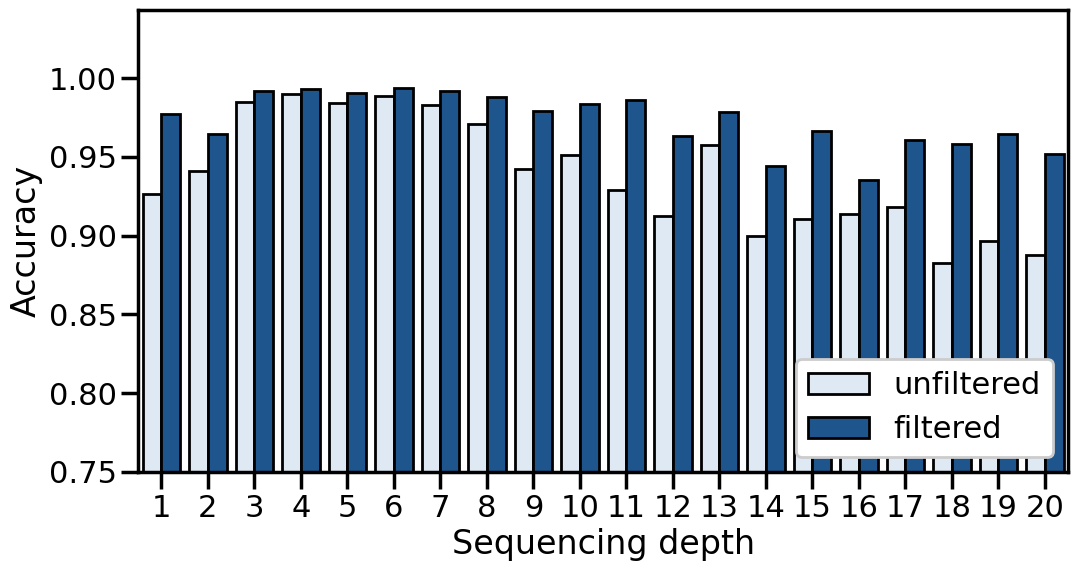

In [23]:
df_plot = df_comparison[["period", "match"]].groupby("period", as_index=False).value_counts(normalize=True).query("match").assign(filt="unfiltered")
df_plot = pd.concat([
    df_plot,
    df_comparison_filt[["period", "match"]].groupby("period", as_index=False).value_counts(normalize=True).query("match").assign(filt="filtered")
])

fig = plt.figure(figsize=(12, 6))

ax = sns.barplot(
    df_plot,
    x="period",
    y="proportion",
    hue="filt",
    palette=[sns.color_palette("Blues")[0], sns.color_palette("Blues")[-1]],
    edgecolor="black"
)

sns.move_legend(ax, "lower right")
_ = ax.get_legend().set(title="")
_ = ax.get_legend().get_frame().set_alpha(1)
_ = ax.set(
    xlabel="Sequencing depth",
    ylabel="Accuracy",    
    ylim=(.75, None)
)